# PROJECT_DE GEZONDHEIDZORG - DATA INGESTION & EDA

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# DATA INGESTION
#1.DATA EXTRACTION     
#2.DATA TRANSFORMATION      
#3.DATA LOAD

# 1.Data Extraction

In [2]:
!pwd
patient_DF = pd.read_csv('../Project1/staticdata.csv',',')
raw_data = patient_DF
display(raw_data)

'pwd' is not recognized as an internal or external command,
operable program or batch file.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18260\1566124220.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  patient_DF = pd.read_csv('../Project1/staticdata.csv',',')


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,73.9,185,99.7,0.9,0.0,2.4,6.9,73.1
1,86.0,172,105.4,1.8,8.1,0.4,4.2,85.0
2,83.3,176,111.4,1.1,0.8,4.6,7.5,81.6
3,82.8,164,111.4,4.7,11.8,1.0,2.9,81.0
4,78.7,178,71.6,1.5,8.3,4.9,5.5,75.0
...,...,...,...,...,...,...,...,...
4091,80.3,176,115.9,3.7,0.1,5.6,5.8,80.7
4092,75.3,162,129.6,3.6,6.2,5.6,7.6,71.1
4093,93.1,189,115.3,2.7,9.4,4.9,6.6,90.0
4094,77.9,170,90.8,2.3,13.2,0.8,6.2,75.9


# Summary of Dataframe

In [3]:
patient_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4096 non-null   object 
 1   length    4096 non-null   object 
 2   mass      4096 non-null   object 
 3   exercise  4096 non-null   object 
 4   smoking   4096 non-null   float64
 5   alcohol   4096 non-null   object 
 6   sugar     4096 non-null   object 
 7   lifespan  4096 non-null   float64
dtypes: float64(2), object(6)
memory usage: 256.1+ KB


# Dropping the null cells and sorting the dataframe

In [4]:
patient_DF = patient_DF.dropna()
patient_DF.info()
patient_data_sort=patient_DF.transform(np.sort)
display(patient_data_sort)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4096 non-null   object 
 1   length    4096 non-null   object 
 2   mass      4096 non-null   object 
 3   exercise  4096 non-null   object 
 4   smoking   4096 non-null   float64
 5   alcohol   4096 non-null   object 
 6   sugar     4096 non-null   object 
 7   lifespan  4096 non-null   float64
dtypes: float64(2), object(6)
memory usage: 256.1+ KB


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,100.0,154,100.0,0.1,0.0,0.0,0.7,-1.0
1,100.0,154,100.0,0.1,0.0,0.0,0.7,-1.0
2,100.1,154,100.1,0.1,0.0,0.0,0.7,57.0
3,100.1,154,100.1,0.1,0.0,0.0,0.7,57.0
4,100.1,155,100.1,0.1,0.0,0.0,0.8,58.7
...,...,...,...,...,...,...,...,...
4091,99.7,214,99.9,5.4,22.1,6.0,9.9,103.2
4092,99.8,214,99.9,5.4,22.1,6.0,9.9,103.5
4093,99.9,undefined,99.9,5.4,22.1,6.0,9.9,103.9
4094,99.9,undefined,?,5.5,22.1,?,9.9,104.1


# Find duplicated records an drop if any

In [5]:
#To find duplicate values

#patient_DF = patient_DF[patient_DF.duplicated( keep =False)]

# Clean the records by coercing the errors

In [6]:
patient_DF1 = patient_DF.apply(pd.to_numeric, errors='coerce')
patient_DF2 = patient_DF1[patient_DF1.select_dtypes(include=[np.number]).ge(0).all(1)]



# 3.Load Cleaned Data

In [7]:
patient_DF2.to_csv('cleaned_data.csv',header = True, index =False)

In [8]:
patient_DF2 = pd.read_csv('../Project1/cleaned_data.csv',',')
cleaned_data = patient_DF2
display(cleaned_data)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18260\4284970547.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  patient_DF2 = pd.read_csv('../Project1/cleaned_data.csv',',')


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0
...,...,...,...,...,...,...,...,...
4079,80.3,176.0,115.9,3.7,0.1,5.6,5.8,80.7
4080,75.3,162.0,129.6,3.6,6.2,5.6,7.6,71.1
4081,93.1,189.0,115.3,2.7,9.4,4.9,6.6,90.0
4082,77.9,170.0,90.8,2.3,13.2,0.8,6.2,75.9


# EXPLORATORY DATA ANALYSIS / Data Visualiasation

# Adding the Column BMI based on length and mass

In [9]:
patient_DF2["BMI"] = (patient_DF2["mass"]/patient_DF2["length"]**2)*10000

display(patient_DF2)

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,BMI
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1,29.130752
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0,35.627366
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6,35.963326
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0,41.418798
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0,22.598157
...,...,...,...,...,...,...,...,...,...
4079,80.3,176.0,115.9,3.7,0.1,5.6,5.8,80.7,37.416064
4080,75.3,162.0,129.6,3.6,6.2,5.6,7.6,71.1,49.382716
4081,93.1,189.0,115.3,2.7,9.4,4.9,6.6,90.0,32.277932
4082,77.9,170.0,90.8,2.3,13.2,0.8,6.2,75.9,31.418685


# Descriptive Statistics

In [10]:
patient_DF2.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,BMI
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,82.278624,183.885162,92.275930,2.403477,9.809035,2.266846,6.487169,80.177693,27.682015
std,7.441333,12.622858,25.801031,1.170426,6.918614,1.801044,2.708622,7.840508,8.711661
min,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,0.700000,57.000000,11.320500
25%,77.600000,175.000000,71.475000,1.500000,3.375000,0.600000,4.400000,75.000000,20.938542
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,6.300000,79.700000,26.476726
75%,86.700000,193.000000,110.825000,3.200000,15.900000,4.000000,8.400000,85.200000,33.207260
max,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,13.800000,105.100000,65.869494


# Distribution of Data-Histogram

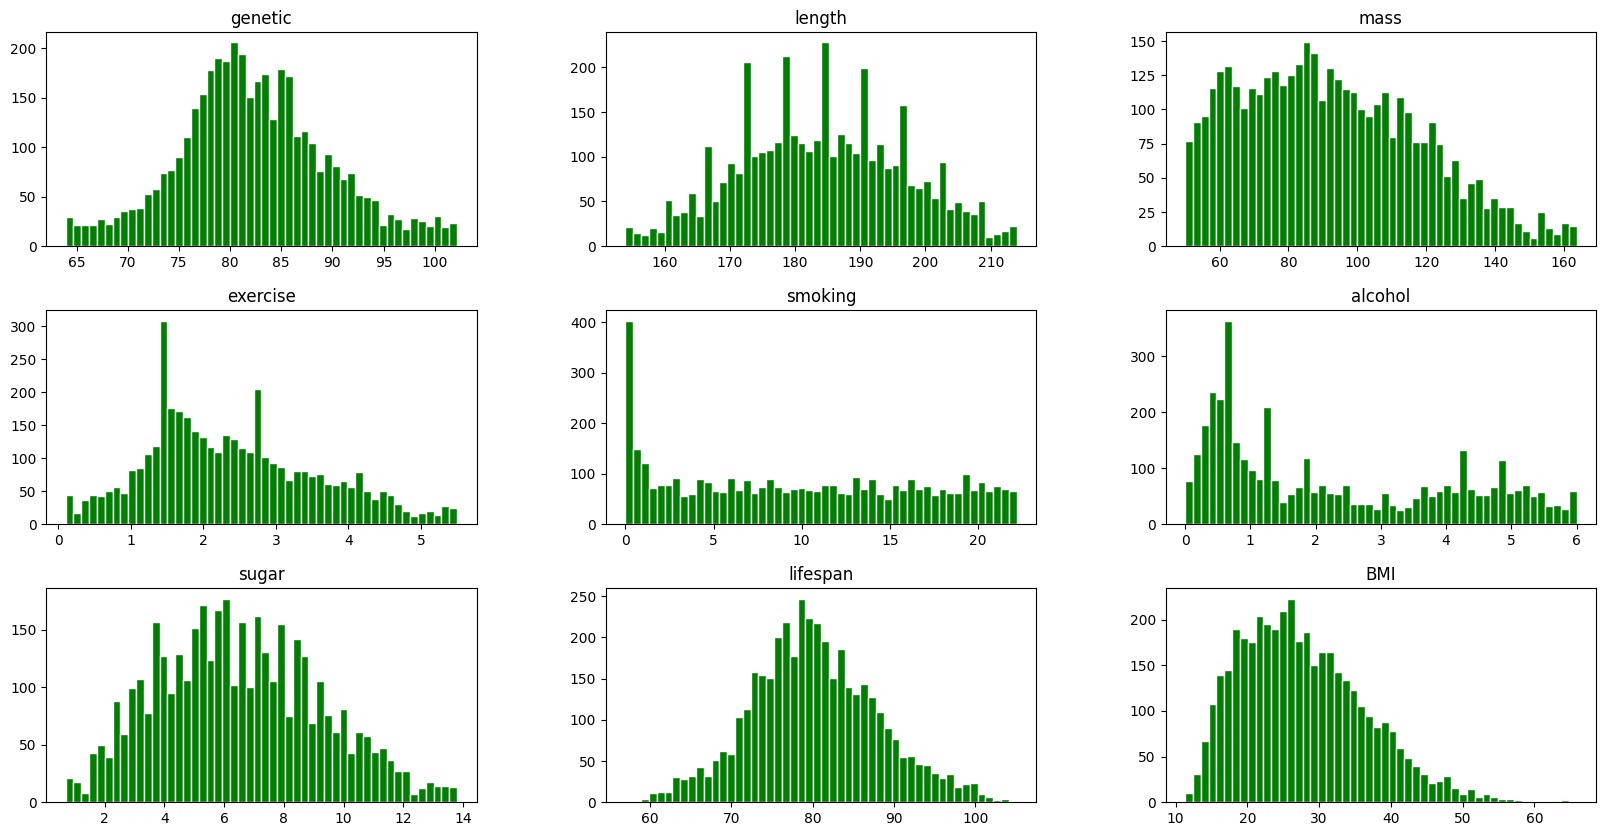

In [11]:
#patient_DF2 = patient_DF2.drop(['length','mass'], axis =1)
patient_DF2_hist = patient_DF2.hist( figsize=(20,10), grid = False, bins = 50, color = "green", ec = "white")

# Heat Map - Correlation between Variables

<AxesSubplot: >

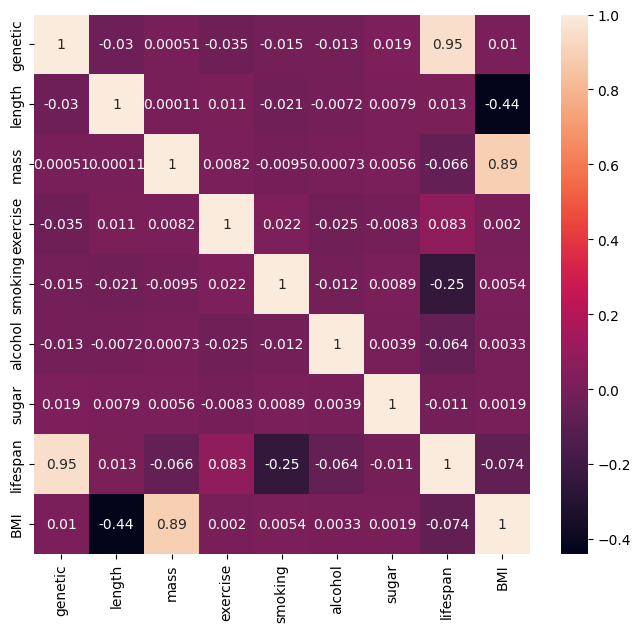

In [12]:
fig = plt.figure(figsize=(8,7))
sns.heatmap(patient_DF2.corr(), annot = True)

# Box Plot

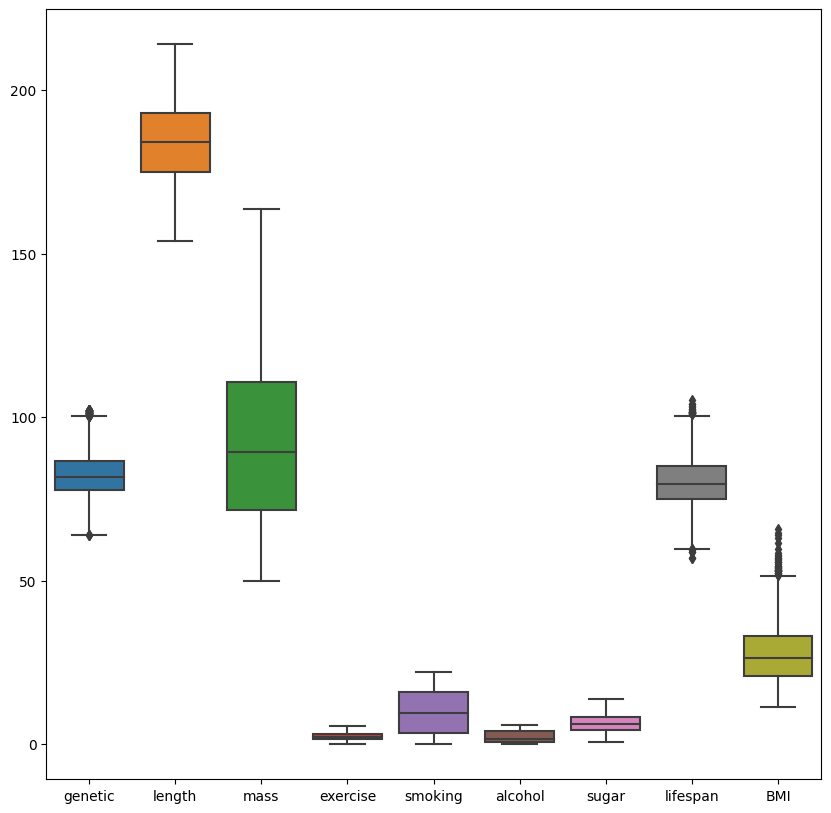

In [13]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data = patient_DF2)

In [14]:

# to fine the record of outliers

# Q1=patient_DF2.quantile(0.25)
# Q3=patient_DF2.quantile(0.75)
# IQR = Q3 - Q1
# print(Q1)
# print(Q3)
# print(IQR)

# patient_DF2 =patient_DF2[~((patient_DF2<(Q1-1.5*IQR)) | (patient_DF2>(Q3+1.5*IQR))).any(axis=1)]
# sns.boxplot(x =patient_DF2['lifespan'])

# Scatter Plot 

<AxesSubplot: xlabel='lifespan', ylabel='BMI'>

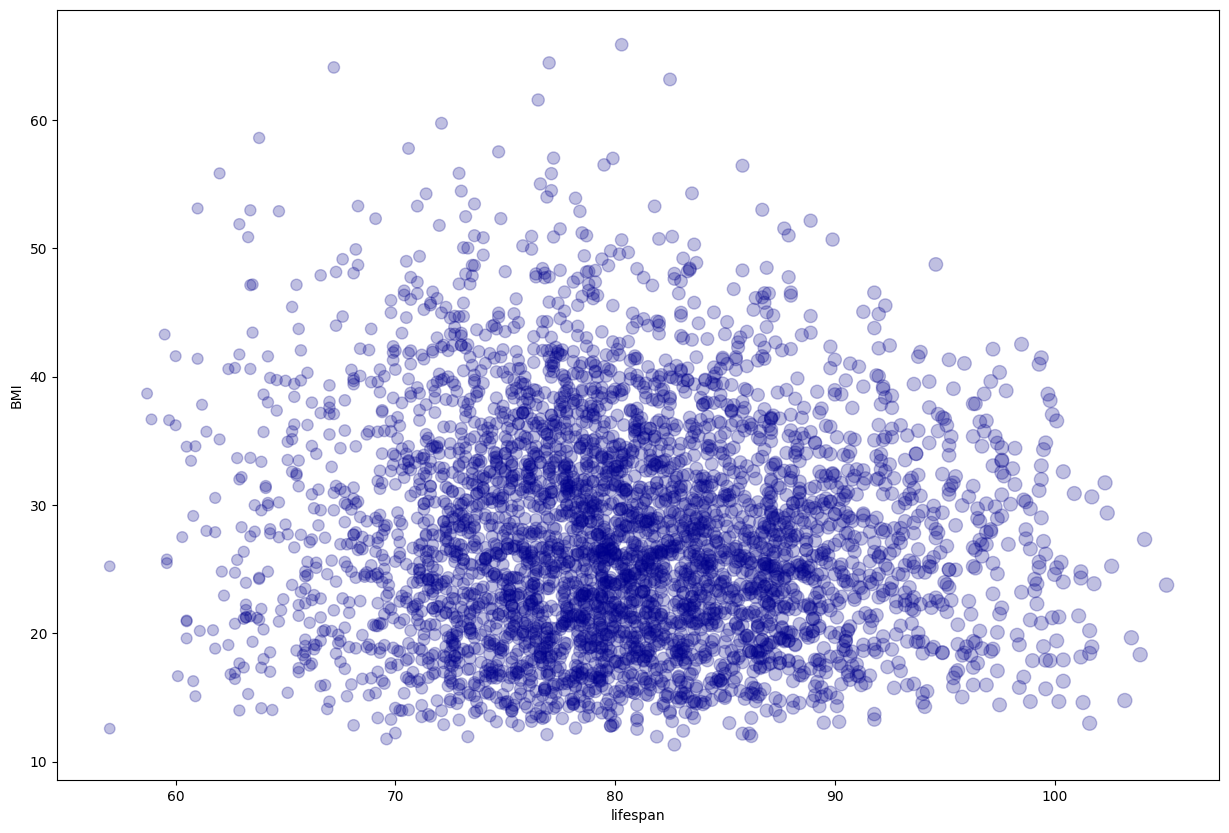

In [15]:
patient_DF2.plot.scatter(x ='lifespan', y= 'BMI', s = 'lifespan' , c= 'darkblue',figsize= (15,10), alpha = 0.25)

# Pair Plot - bivariate distributions

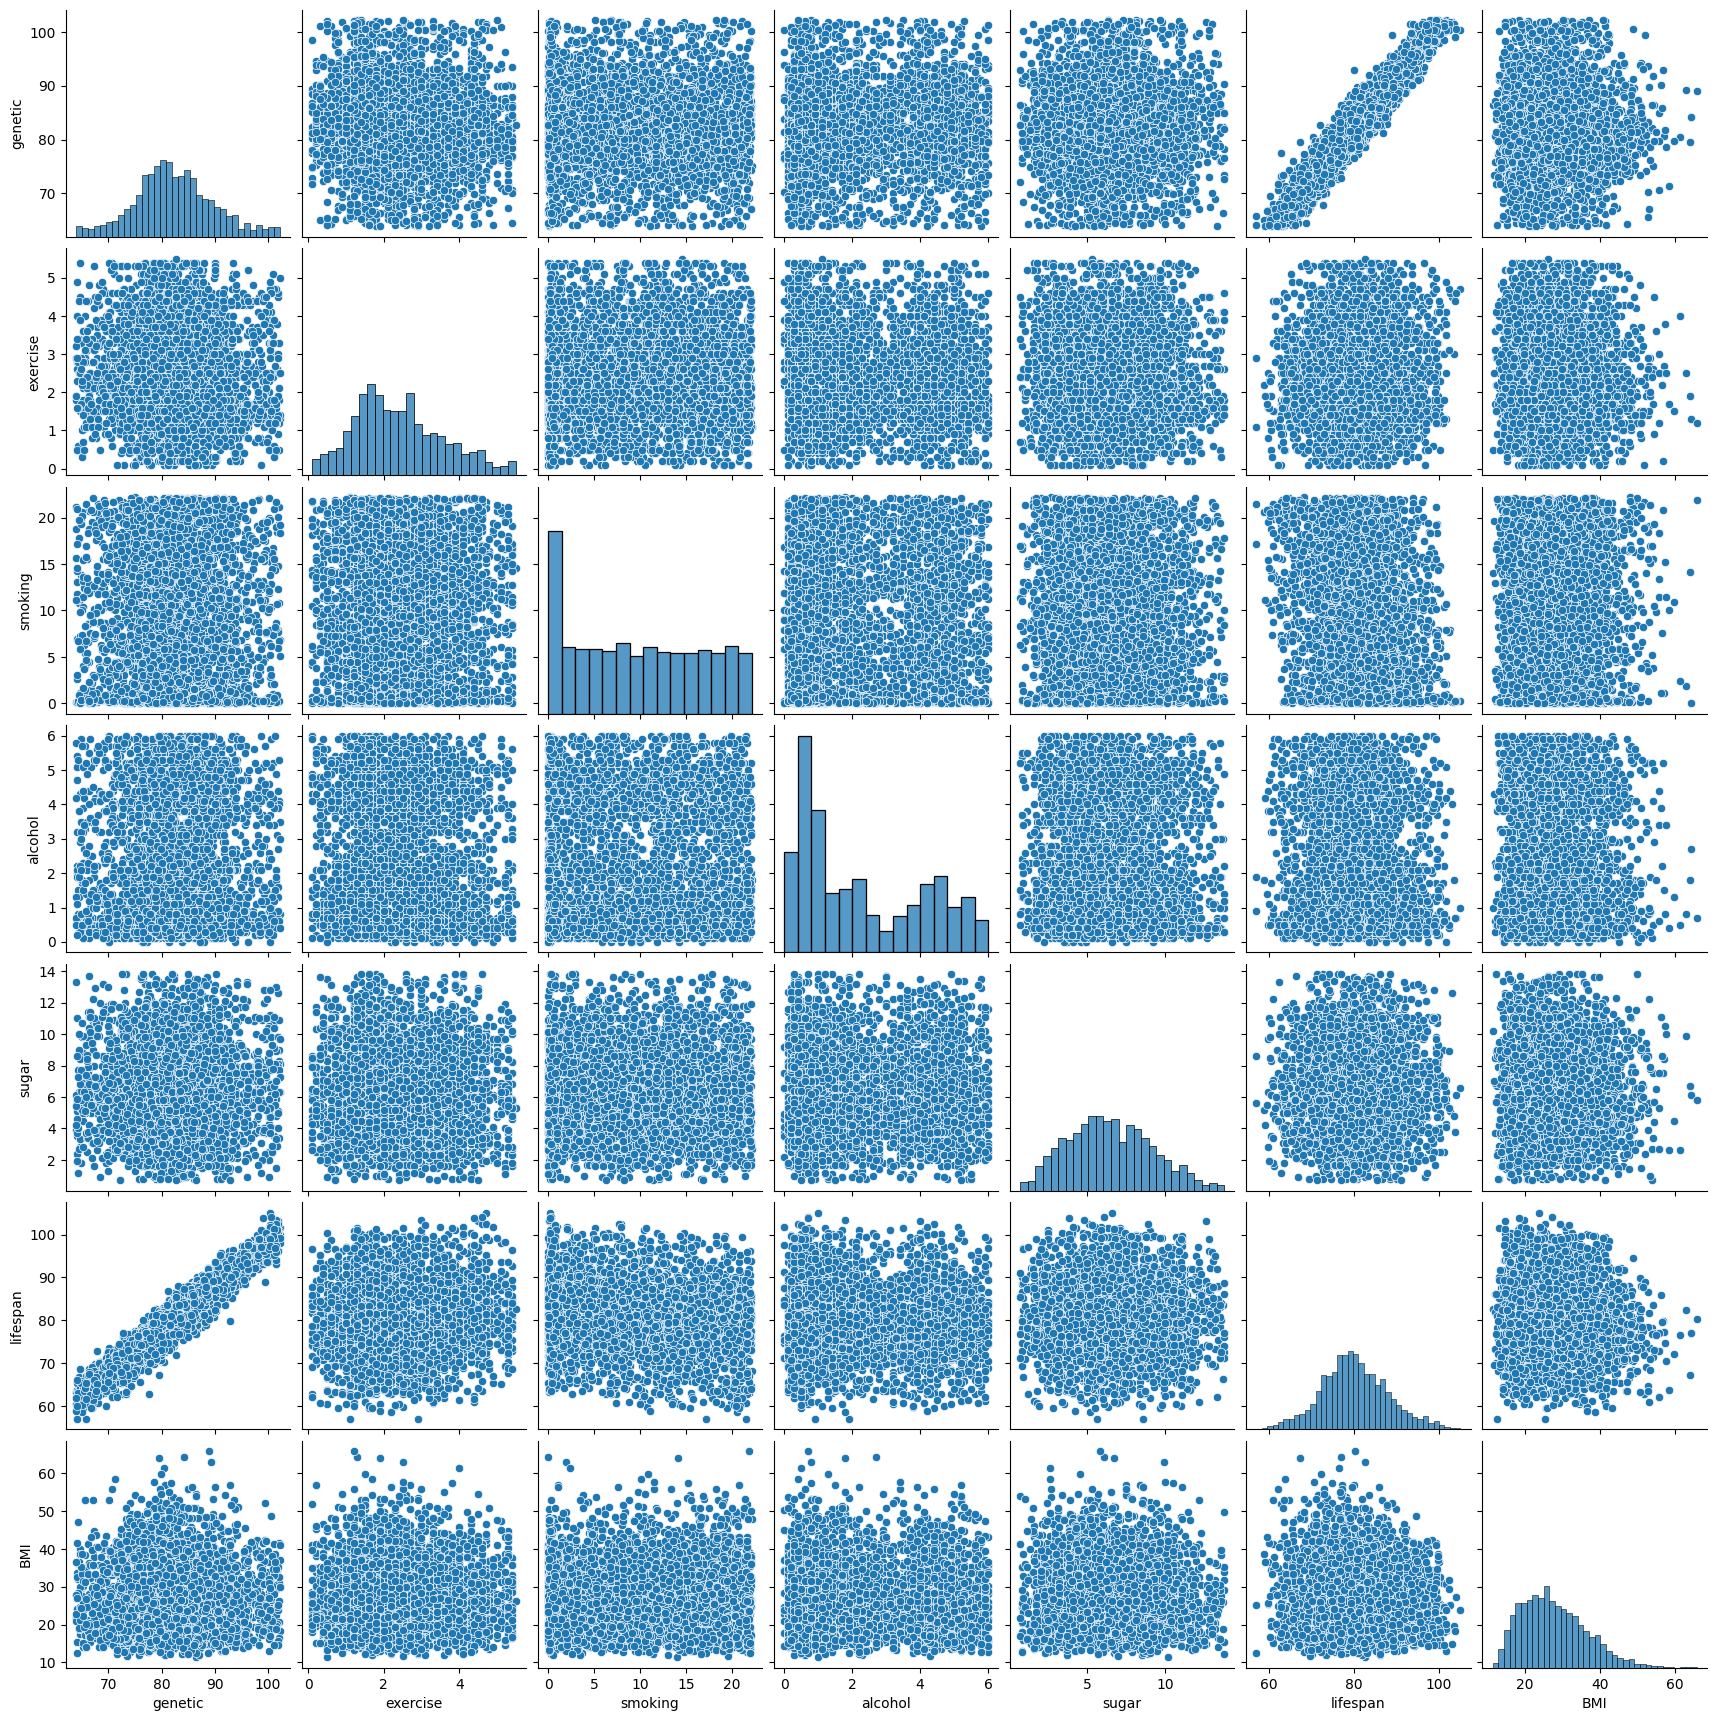

In [16]:
patient_DF3 = patient_DF2.drop(['length','mass'], axis =1)

sns.pairplot(patient_DF3)